In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [90]:
df=pd.read_csv('American_Housing_Data.csv')

In [91]:
df = df.rename(columns={'County': 'Country'})

In [92]:
df.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,Country,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601


In [93]:
df.shape

(39981, 14)

In [94]:
df.duplicated().sum()

962

In [95]:
df=df.drop_duplicates()

In [96]:
df.dtypes

Zip Code                     int64
Price                      float64
Beds                         int64
Baths                        int64
Living Space                 int64
Address                     object
City                        object
State                       object
Zip Code Population          int64
Zip Code Density           float64
Country                     object
Median Household Income    float64
Latitude                   float64
Longitude                  float64
dtype: object

In [97]:
df.isnull().any()

Zip Code                   False
Price                      False
Beds                       False
Baths                      False
Living Space               False
Address                    False
City                       False
State                      False
Zip Code Population        False
Zip Code Density           False
Country                    False
Median Household Income     True
Latitude                   False
Longitude                  False
dtype: bool

In [98]:
df['Median Household Income'].isna()

0        False
2        False
3        False
4        False
5        False
         ...  
39976    False
39977    False
39978    False
39979    False
39980    False
Name: Median Household Income, Length: 39019, dtype: bool

In [99]:
df['Median Household Income']=df['Median Household Income'].fillna(0)

In [100]:
df.isnull().any()

Zip Code                   False
Price                      False
Beds                       False
Baths                      False
Living Space               False
Address                    False
City                       False
State                      False
Zip Code Population        False
Zip Code Density           False
Country                    False
Median Household Income    False
Latitude                   False
Longitude                  False
dtype: bool

In [101]:
df.corr(numeric_only=True)

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
Zip Code,1.000000,0.112875,0.013742,0.005866,0.033476,-0.024655,-0.102588,0.154010,-0.056927,-0.940094
Price,0.112875,1.000000,0.276218,0.461248,0.519402,-0.042314,0.153073,0.416894,-0.059571,-0.170146
Beds,0.013742,0.276218,1.000000,0.703461,0.653033,0.068917,-0.133101,0.013908,-0.050115,0.008009
Baths,0.005866,0.461248,0.703461,1.000000,0.767713,0.002532,-0.067943,0.225777,-0.099740,-0.000512
Living Space,0.033476,0.519402,0.653033,0.767713,1.000000,-0.043060,-0.104544,0.222165,-0.059543,-0.011594
Zip Code Population,-0.024655,-0.042314,0.068917,0.002532,-0.043060,1.000000,0.107848,-0.122640,-0.088207,-0.019426
Zip Code Density,-0.102588,0.153073,-0.133101,-0.067943,-0.104544,0.107848,1.000000,0.178669,0.181011,0.017621
Median Household Income,0.154010,0.416894,0.013908,0.225777,0.222165,-0.122640,0.178669,1.000000,0.045554,-0.227123
Latitude,-0.056927,-0.059571,-0.050115,-0.099740,-0.059543,-0.088207,0.181011,0.045554,1.000000,-0.040920
Longitude,-0.940094,-0.170146,0.008009,-0.000512,-0.011594,-0.019426,0.017621,-0.227123,-0.040920,1.000000


In [102]:
df.describe()

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
count,39019.000000,3.901900e+04,39019.000000,39019.000000,39019.000000,39019.000000,39019.000000,39019.000000,39019.000000,39019.000000
mean,64870.425818,6.217622e+05,3.171378,2.463748,1899.984187,37697.457905,2367.620880,110780.953023,36.444635,-98.048619
std,25509.952267,9.531520e+05,1.309513,1.325817,1210.783157,18635.871043,2931.105982,47296.469777,4.449218,15.024340
min,10013.000000,1.800000e+03,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,25.729830,-122.826870
25%,40218.000000,2.649000e+05,3.000000,2.000000,1201.500000,24440.000000,897.100000,76629.000000,32.996870,-111.634760
50%,74136.000000,3.999000e+05,3.000000,2.000000,1638.000000,35083.000000,1578.800000,100405.000000,36.167890,-96.839430
75%,85716.000000,6.690000e+05,4.000000,3.000000,2265.000000,46816.000000,2727.000000,134948.000000,39.284210,-85.715710
max,98199.000000,3.800000e+07,54.000000,66.000000,74340.000000,116469.000000,58289.600000,900203.000000,47.742370,-73.704510


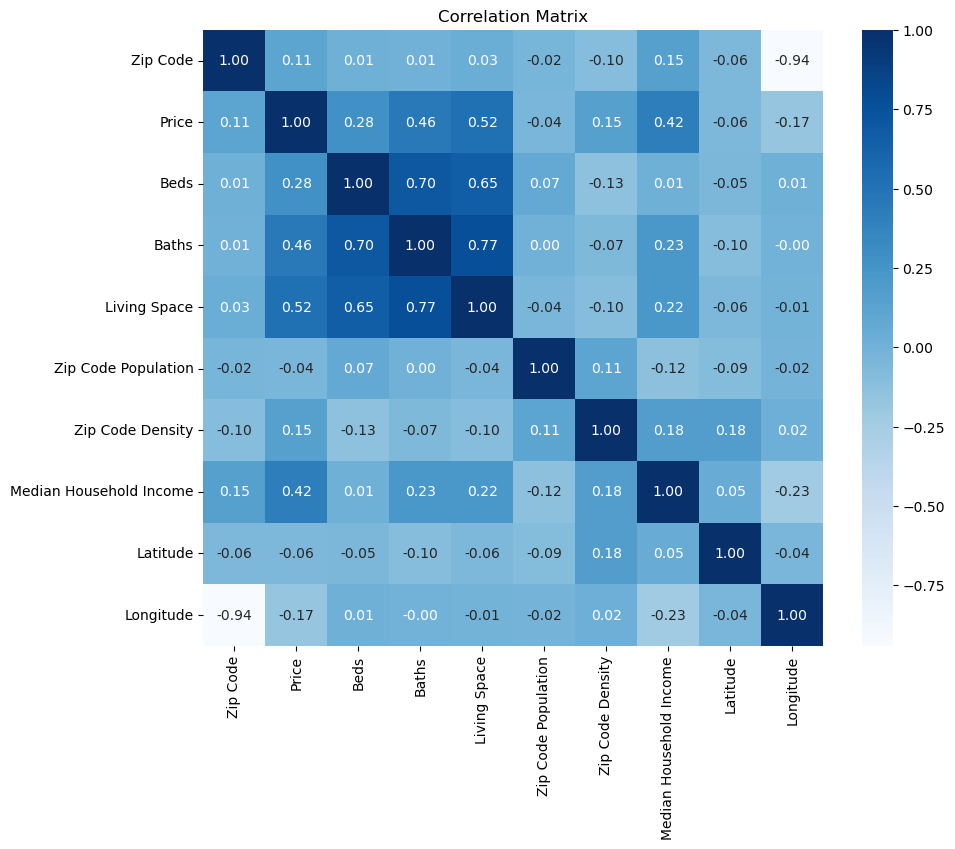

In [103]:
import seaborn as sns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

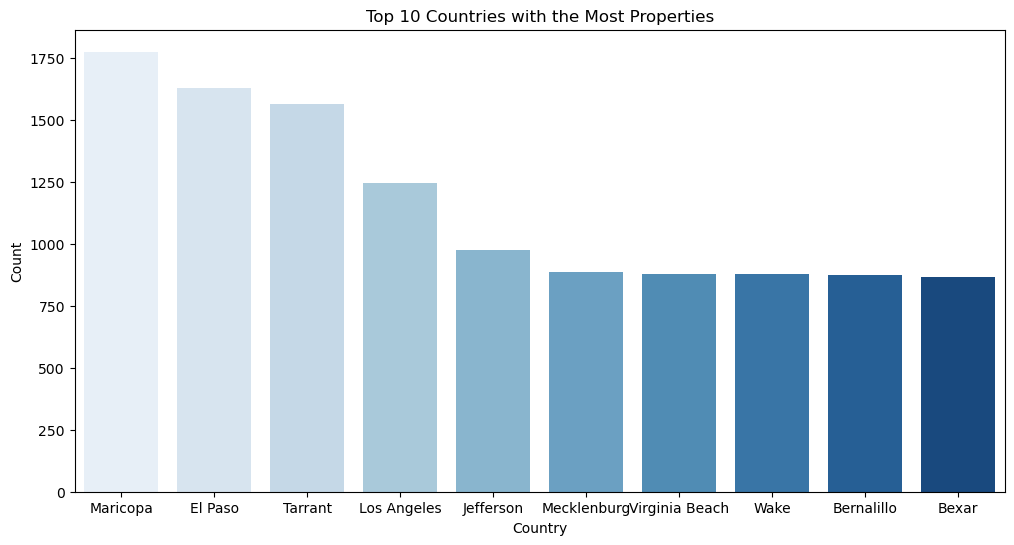

In [104]:
top_10_country = df['Country'].value_counts().nlargest(10).index

df_top_10_country = df[df['Country'].isin(top_10_country)]

plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=df_top_10_country, palette='Blues', order=top_10_country)
plt.title('Top 10 Countries with the Most Properties')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

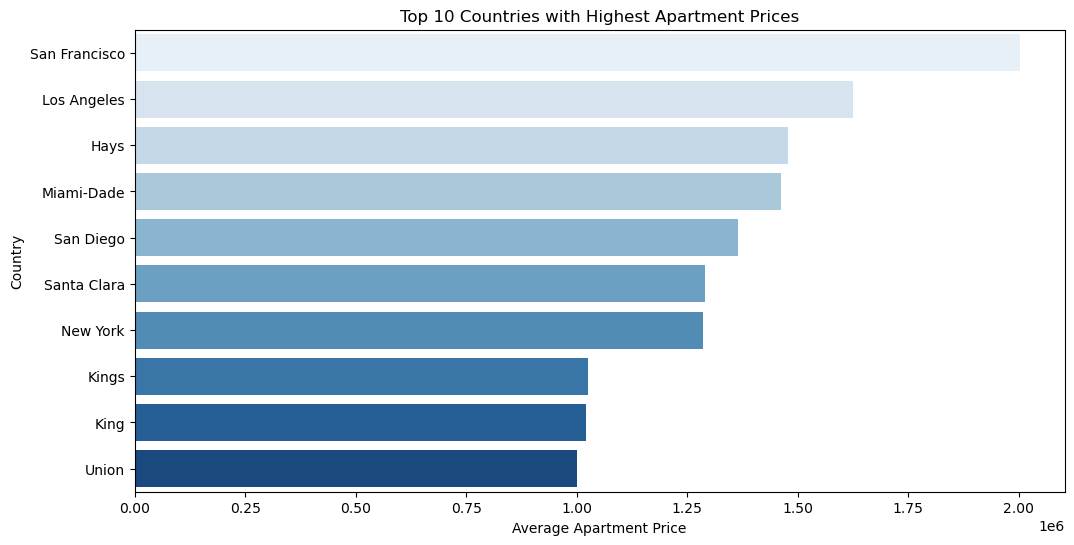

In [105]:
top_countries = df.groupby('Country')['Price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues')
plt.title('Top 10 Countries with Highest Apartment Prices')
plt.xlabel('Average Apartment Price')
plt.ylabel('Country')
plt.show()

In [106]:
df.dtypes

Zip Code                     int64
Price                      float64
Beds                         int64
Baths                        int64
Living Space                 int64
Address                     object
City                        object
State                       object
Zip Code Population          int64
Zip Code Density           float64
Country                     object
Median Household Income    float64
Latitude                   float64
Longitude                  float64
dtype: object

In [107]:
from sklearn.preprocessing import LabelEncoder
city_label_encoder = LabelEncoder()
df['City'] = city_label_encoder.fit_transform(df['City'])
country_label_encoder = LabelEncoder()
df['Country'] = country_label_encoder.fit_transform(df['Country'])
state_label_encoder = LabelEncoder()
df['State'] = state_label_encoder.fit_transform(df['State'])

In [108]:
df.dtypes

Zip Code                     int64
Price                      float64
Beds                         int64
Baths                        int64
Living Space                 int64
Address                     object
City                         int32
State                        int32
Zip Code Population          int64
Zip Code Density           float64
Country                      int32
Median Household Income    float64
Latitude                   float64
Longitude                  float64
dtype: object

In [109]:
X=df[['Beds','Baths','Living Space','City','State','Zip Code Population','Zip Code Density','Country','Country','Median Household Income']]
y=df[['Price']]

In [110]:
X

,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,Country,Country,Median Household Income
0,2,3,1967,150,18,29563,20967.9,57,57,370046.0
2,1,1,718,150,18,29815,23740.9,57,57,249880.0
3,3,2,1538,150,18,29815,23740.9,57,57,249880.0
4,1,1,600,150,18,29815,23740.9,57,57,249880.0
5,1,1,643,150,18,15514,20107.7,57,57,188289.0
...,...,...,...,...,...,...,...,...,...,...
39976,4,4,3380,204,27,22890,2086.8,46,46,205611.0
39977,4,4,2878,204,27,22890,2086.8,46,46,205611.0
39978,3,2,1380,204,27,22890,2086.8,46,46,205611.0
39979,2,1,856,204,27,22890,2086.8,46,46,205611.0


In [111]:
y

,Price
0,3999000.0
2,1650000.0
3,760000.0
4,1100000.0
5,764900.0
...,...
39976,2495000.0
39977,2295000.0
39978,950000.0
39979,425000.0


In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)
 

LinearRegression()

In [113]:
print(regressor.intercept_)

[-723646.6327291]


In [114]:
print(regressor.coef_) 

[[-6.42623917e+04  1.11908743e+05  3.31497771e+02  3.15649359e+02
  -1.16656884e+04  1.85638129e-01  4.27717529e+01  8.38087321e+02
   8.38087321e+02  5.18072270e+00]]


In [115]:
y_pred = regressor.predict(X_test)
y_test_flat = np.ravel(y_test)
y_pred_flat = np.ravel(y_pred)

# Create DataFrame
dp = pd.DataFrame({'Actual': y_test_flat, 'Predicted': y_pred_flat})

In [116]:
dp.sample(10)

,Actual,Predicted
5394,384000.0,6.570040e+05
8173,427000.0,7.015007e+05
4622,209000.0,4.173867e+05
7235,1200000.0,1.041973e+06
9240,255000.0,2.613230e+05
3212,500000.0,7.089611e+05
11613,1579000.0,1.511288e+06
1595,1049900.0,1.280925e+06
9910,175000.0,-3.645980e+05
4701,245000.0,5.389447e+05


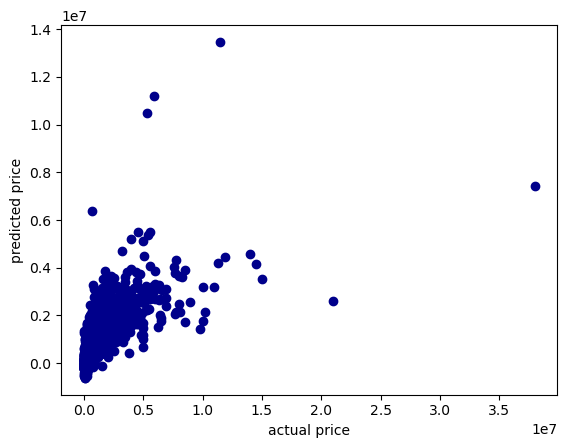

In [117]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,color='darkblue')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()

In [118]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
#how close the data, 

0.47154082015553545

C:\Users\Asus\AppData\Local\Temp\ipykernel_23408\3777846963.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,x='Beds',y='Price', palette='Blues') #seaborn.pydata.org color palettes


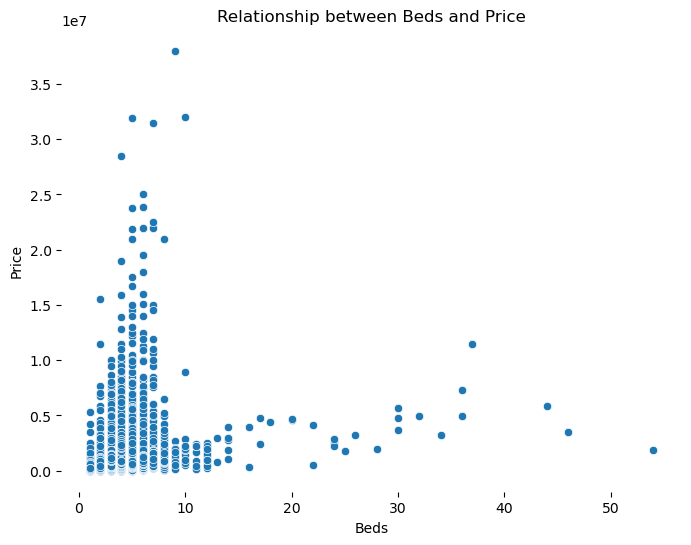

In [119]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='Beds',y='Price', palette='Blues') #seaborn.pydata.org color palettes
sns.despine(left=True, bottom=True, right=True, top=True)
plt.title('Relationship between Beds and Price')
plt.xlabel('Beds')
plt.ylabel('Price')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_23408\1877435917.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,x='Baths',y='Price',palette='Blues') #seaborn.pydata.org color palettes


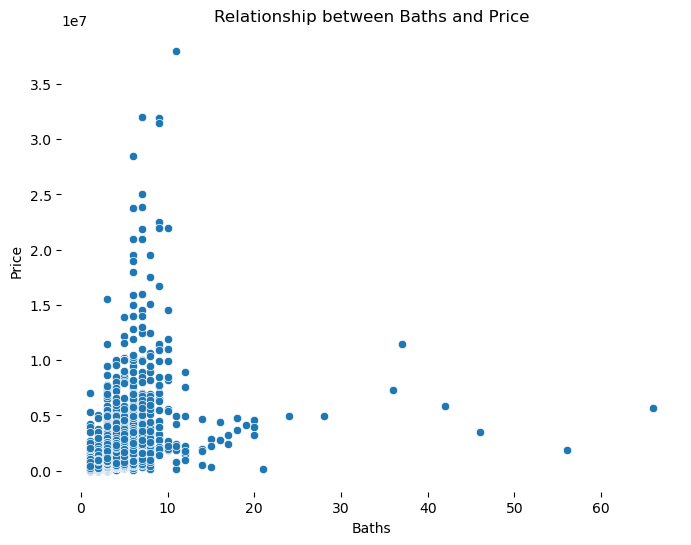

In [120]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='Baths',y='Price',palette='Blues') #seaborn.pydata.org color palettes
sns.despine(left=True, bottom=True, right=True, top=True)
plt.title('Relationship between Baths and Price')
plt.xlabel('Baths')
plt.ylabel('Price')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_23408\1877435917.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,x='Baths',y='Price',palette='Blues') #seaborn.pydata.org color palettes


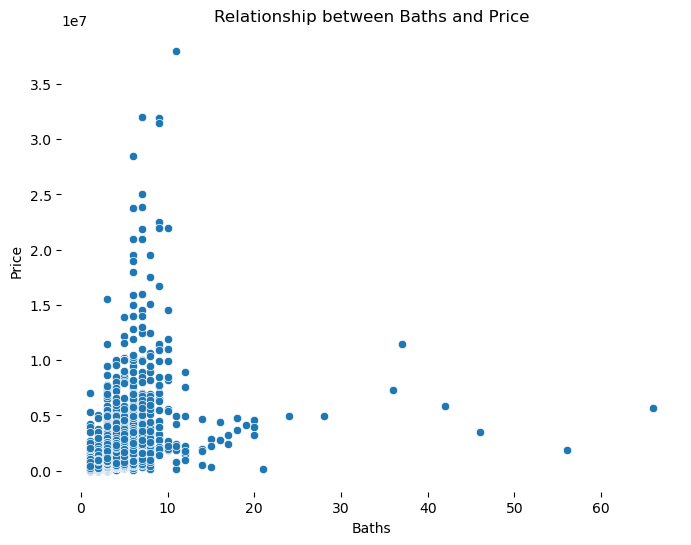

In [121]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='Baths',y='Price',palette='Blues') #seaborn.pydata.org color palettes
sns.despine(left=True, bottom=True, right=True, top=True)
plt.title('Relationship between Baths and Price')
plt.xlabel('Baths')
plt.ylabel('Price')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_23408\2432788709.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,x='Living Space',y='Price',palette='Blues') #seaborn.pydata.org color palettes


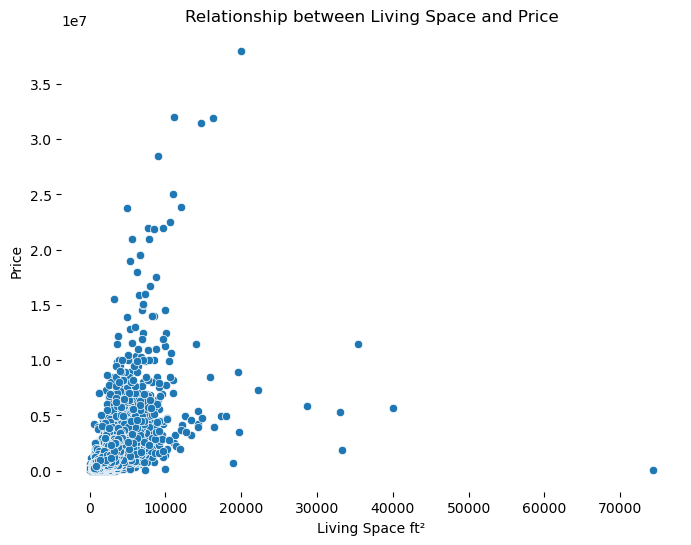

In [122]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='Living Space',y='Price',palette='Blues') #seaborn.pydata.org color palettes
sns.despine(left=True, bottom=True, right=True, top=True)
plt.title('Relationship between Living Space and Price')
plt.xlabel('Living Space ft²')
plt.ylabel('Price')
plt.show()

Text(0.5, 1.0, 'Baths Distribution')

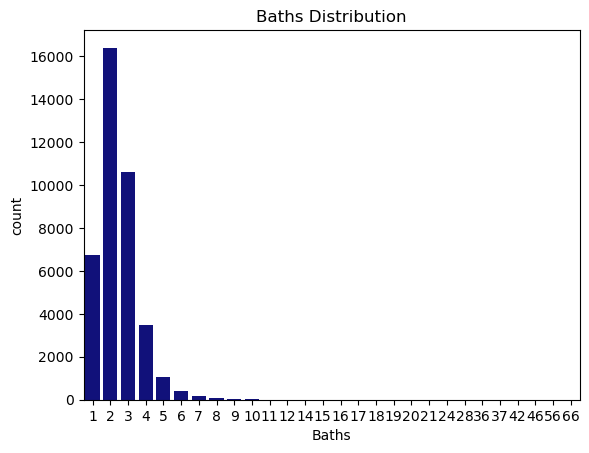

In [123]:
sns.countplot(x='Baths', data=df,color='darkblue')
plt.title('Baths Distribution')

Text(0.5, 1.0, 'Beds Desrtibution')

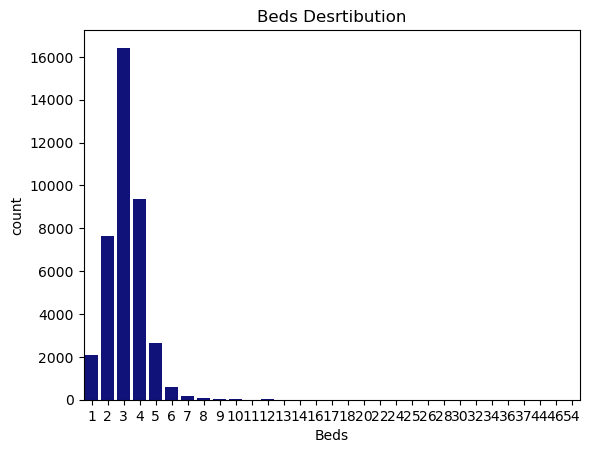

In [124]:
sns.countplot(x='Beds', data=df,color='darkblue')
plt.title('Beds Desrtibution')

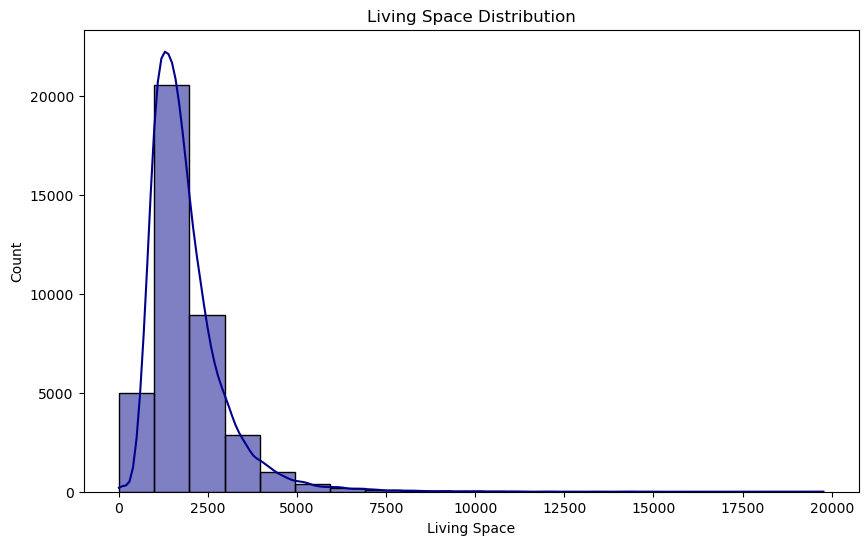

In [125]:
plt.figure(figsize=(10, 6))

# Filter data for 'Living Space' less than 20000
filtered_data = df[df['Living Space'] < 20000]

# Create a histogram for the filtered data
sns.histplot(data=filtered_data, x='Living Space', color='darkblue', bins=20, kde=True)
plt.title('Living Space Distribution')

# Additional code for visualization customization may be needed

plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_23408\1725324716.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Zip Code Population'],palette='viridis', kde=True).set_title('Zip Code Population Distribution')


Text(0.5, 1.0, 'Zip Code Population Distribution')

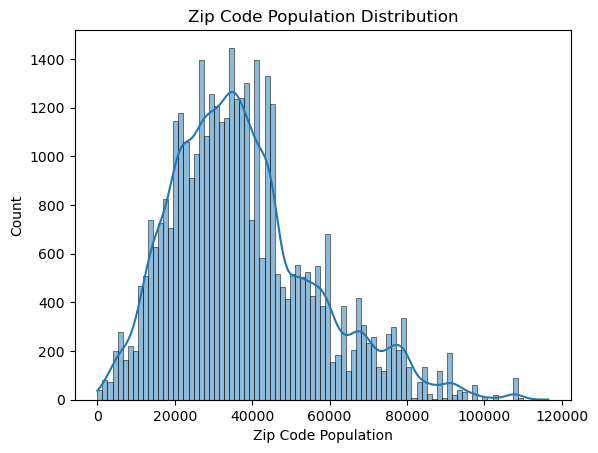

In [126]:


sns.histplot(df['Zip Code Population'],palette='viridis', kde=True).set_title('Zip Code Population Distribution')

C:\Users\Asus\AppData\Local\Temp\ipykernel_23408\2367320913.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Country'],palette='viridis', kde=True).set_title('Country Distribution')


Text(0.5, 1.0, 'Country Distribution')

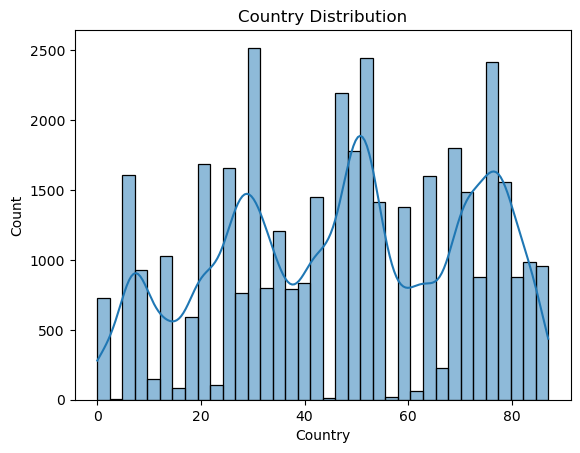

In [127]:
sns.histplot(df['Country'],palette='viridis', kde=True).set_title('Country Distribution')

C:\Users\Asus\AppData\Local\Temp\ipykernel_23408\4259515829.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Median Household Income'], bins=30, palette='viridis',kde=True, ax=axs[2, 1])


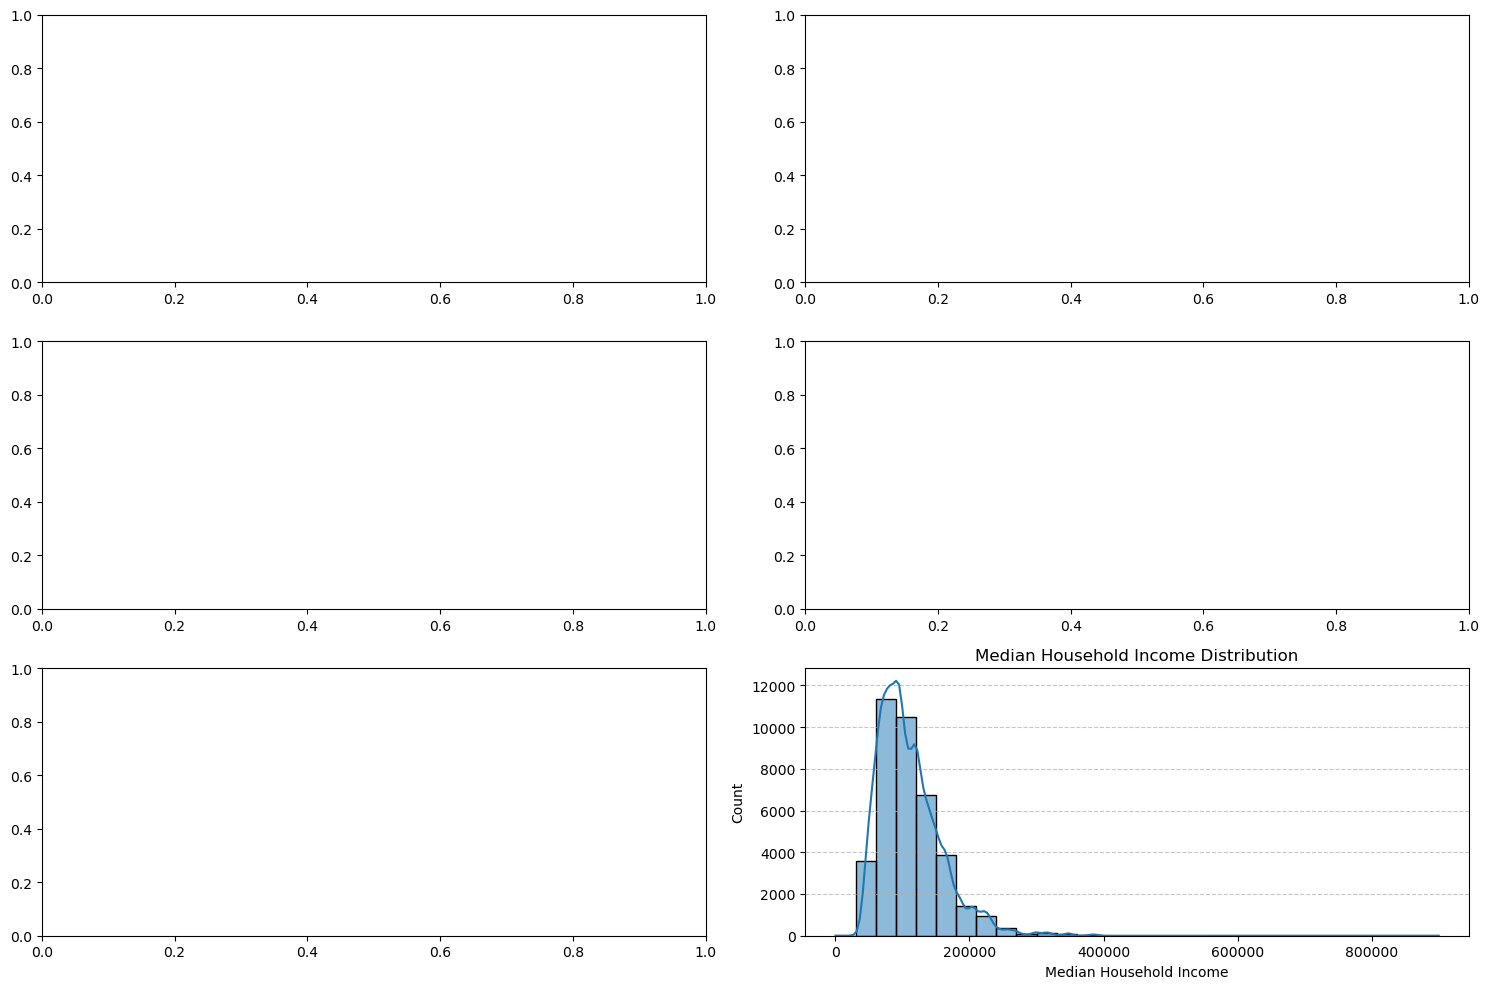

In [128]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Create a histogram subplot with specified bins and title
sns.histplot(df['Median Household Income'], bins=30, palette='viridis',kde=True, ax=axs[2, 1])
axs[2, 1].set_title('Median Household Income Distribution')

# Additional customization for subplot appearance
axs[2, 1].set_xlabel('Median Household Income')
axs[2, 1].set_ylabel('Count')
axs[2, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Additional code for visualization customization or layout adjustments may be needed

plt.tight_layout()
plt.show()

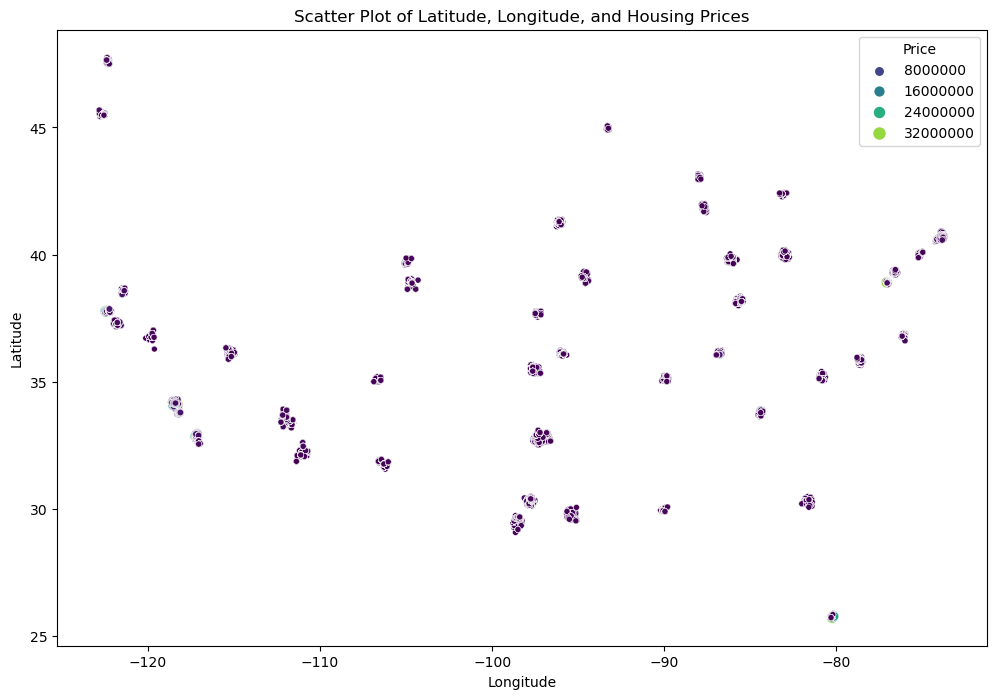

In [129]:
plt.figure(figsize=(12, 8))

# Create a scatter plot
sns.scatterplot(x='Longitude', y='Latitude', hue='Price', palette='viridis',size='Price', data=df)
plt.title('Scatter Plot of Latitude, Longitude, and Housing Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)



C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error (MSE): 347685868880.73694
Mean Absolute Error (MAE): 156381.1996049094
R^2 Score: 0.6890133405641873


In [139]:
print(mae)

156381.1996049094


In [135]:
print(mse)

156381.1996049094


In [137]:
print(r2)

0.6890133405641873
